In [1]:
# Pandas
import pandas as pd

#matplot
#%matplotlib notebook
import matplotlib.pyplot as plt

#numpy
import numpy as np

# SQL Alchemy
from sqlalchemy import create_engine

#path
database_path = "../sql_challenge/SQLHWfull.sqlite"

In [2]:
# Create Engine
engine = create_engine(f"sqlite:///{database_path}")
conn = engine.connect()

In [3]:
# Query All Records in the the employees/titles/salaries tables
emp_data = pd.read_sql("SELECT * FROM employees", conn)
title_data = pd.read_sql("SELECT * FROM titles", conn)
salary_data = pd.read_sql("SELECT * FROM salaries", conn)
emp_499942 = pd.read_sql("SELECT first_name,last_name FROM employees WHERE emp_no = 499942", conn)

In [4]:
#merging salary and employee tables for histogram
emp_sal_data = pd.merge(emp_data,salary_data, on="emp_no")

In [5]:
#viewing the merged table
emp_sal_data.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [6]:
#seeing the info to see relation with hist
emp_sal_data.describe()

,emp_no,salary
count,300024.000000,300024.000000
mean,253321.763392,52970.732451
std,161828.235540,14301.478491
min,10001.000000,40000.000000
25%,85006.750000,40000.000000
50%,249987.500000,48681.000000
75%,424993.250000,61758.000000
max,499999.000000,129492.000000


(array([1.51743e+05, 5.37790e+04, 4.10980e+04, 2.73130e+04, 1.55650e+04,
        7.20900e+03, 2.48700e+03, 6.69000e+02, 1.43000e+02, 1.80000e+01]),
 array([ 40000. ,  48949.2,  57898.4,  66847.6,  75796.8,  84746. ,
         93695.2, 102644.4, 111593.6, 120542.8, 129492. ]),
 <BarContainer object of 10 artists>)

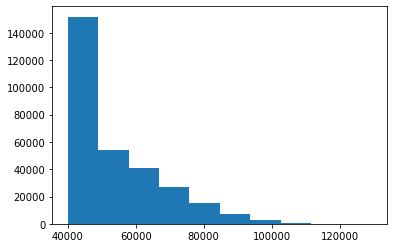

In [7]:
#plotting the histogram
plt.hist(emp_sal_data['salary'])

In [8]:
#renaming a column to merge with the title_data
rnm_emp_sal_data = emp_sal_data.rename(columns={"emp_title_id": "title_id"})

In [9]:
#merging the title_data with the already merged employee/salaries data
all_data = pd.merge(rnm_emp_sal_data,title_data, on='title_id')

In [10]:
#taking the needed(ndd) columns for the groupby
all_ndd_data = all_data[['salary','title']]

In [11]:
#finding the average salary per title using groupby
grpd_data = all_ndd_data.groupby(['title']).mean()

In [12]:
#viewing the grouped data
grpd_data

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


<AxesSubplot:xlabel='title'>

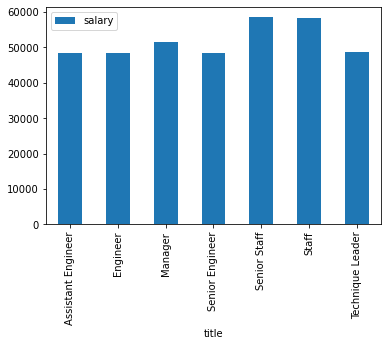

In [13]:
#plotting the bar for average salary by title
grpd_data.plot.bar()

In [14]:
emp_499942

,first_name,last_name
0,April,Foolsday
